In [1]:
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import datetime

In [2]:
import warnings    
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('GlobalLandTemperaturesByCity.csv', parse_dates=["dt"])

In [6]:
data.shape

(8599212, 7)

In [7]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [8]:
data.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [9]:
missing_values = data[data["AverageTemperature"].isna() == True ]
print(missing_values.shape)
missing_values.head(5)

(364130, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [10]:
missing_values["City"].value_counts()

Port Louis      1039
Saint Denis     1039
Fianarantsoa    1036
Mahajanga        958
Nacala           958
                ... 
Macheng            1
Zaozhuang          1
Angarsk            1
Laredo             1
Oruro              1
Name: City, Length: 3323, dtype: int64

Out of 85,00000 entry, 30000 data are missing for average temperature. so I'll drop the missing values


In [11]:
data.dropna(inplace=True)
data.shape

(8235082, 7)

most common countries in dataset

Text(0.5, 0, '(The red line referes to the Mean)')

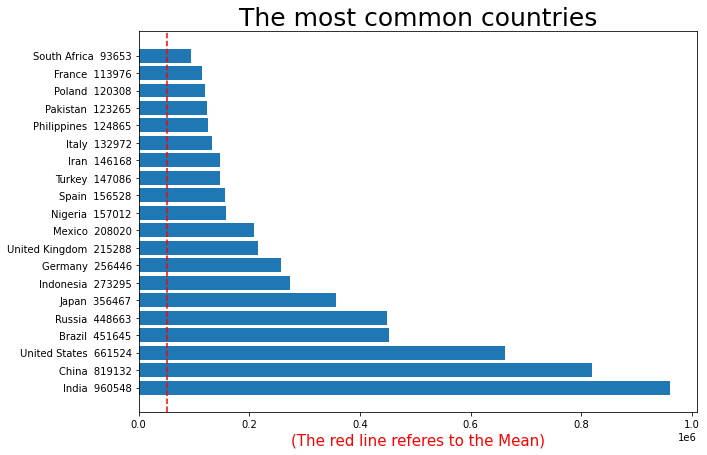

In [12]:
most_countries = data["Country"].value_counts()[:20]
cwc = []
for i in zip(most_countries.index , most_countries.values):
    cit = i[0]+"  "+str(i[1])
    cwc.append(cit)
plt.figure(figsize=(10,7))
plt.barh(cwc , most_countries.values)
plt.axvline(x=data["Country"].value_counts().values.mean() , color="red" ,linestyle="--" )
plt.title("The most common countries" , fontsize=25)
plt.xlabel("(The red line referes to the Mean)" , c="red" , fontsize=15)

In [13]:
maj_count = []
cwc = []
for i in most_countries.index:
    temp = data[data["Country"] == i]["City"]
    maj_count.append(len(temp.unique()))
    cit = i+"  "+str(len(temp.unique()))
    cwc.append(cit)

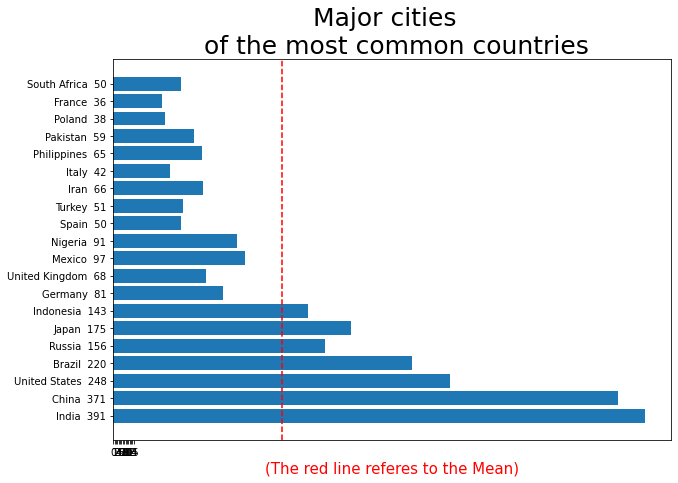

In [14]:
plt.figure(figsize=(10,7))
plt.barh(cwc , maj_count)
plt.axvline(x=(int(sum(maj_count)/len(maj_count))) , color="red" ,linestyle="--" )
tex = "Major cities  \n of the most common countries" 
plt.title(tex, fontsize=25 )
plt.xlabel("(The red line referes to the Mean)" , c="red" , fontsize=15)
xticks = plt.xticks(range(16))

In [15]:
temp = data.groupby(["Country" , "City"]).mean()
hottest = temp.sort_values(["AverageTemperature"] , ascending=False)[:20]
hottest = hottest.sort_values(["AverageTemperature"] , ascending=True)
coldest = temp.sort_values(["AverageTemperature"] , ascending=True)[:20]
coldest = coldest.sort_values(["AverageTemperature"] , ascending=False)



hottest_index = []
for i in hottest.index:
    cit = i[1] + " , " + i[0]
    hottest_index.append(cit)
    
coldest_index = []
for i in coldest.index:
    cit = i[1] + " , " + i[0]
    coldest_index.append(cit)

Text(6, 17, '(Global average temprature)')

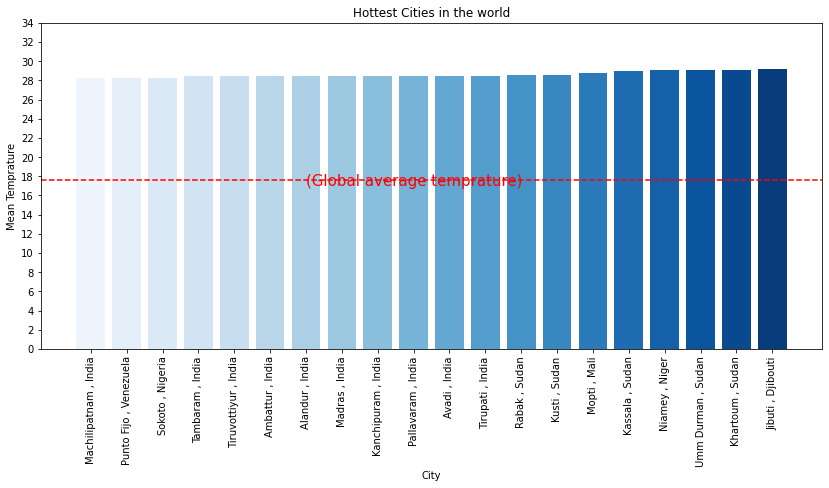

In [16]:
plt.figure(figsize=(14,6))

plt.bar(hottest_index , hottest.values[:,0]
        , color=sns.color_palette("Blues" , len(hottest) ))
plt.axhline(y=temp["AverageTemperature"].mean() , color="red" , linestyle="--")
plt.yticks(np.arange(0,35,2))
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Mean Temprature")
plt.title("Hottest Cities in the world")
plt.text(6,17,"(Global average temprature)" , color="red" , fontsize=15 )

In [30]:
coldest.values[:,0]

array([ -1.60179068,  -1.64628187,  -1.73391093,  -1.75841131,
        -1.82290807,  -1.82290807,  -2.30164561,  -2.3379145 ,
        -2.37096248,  -2.51298015,  -2.51298015,  -2.81798489,
        -3.17991541,  -3.36548532,  -3.53828111,  -3.53828111,
        -3.99679974,  -4.36029996,  -6.22245188, -11.85474968])

Text(6, 17, '(Global average temprature)')

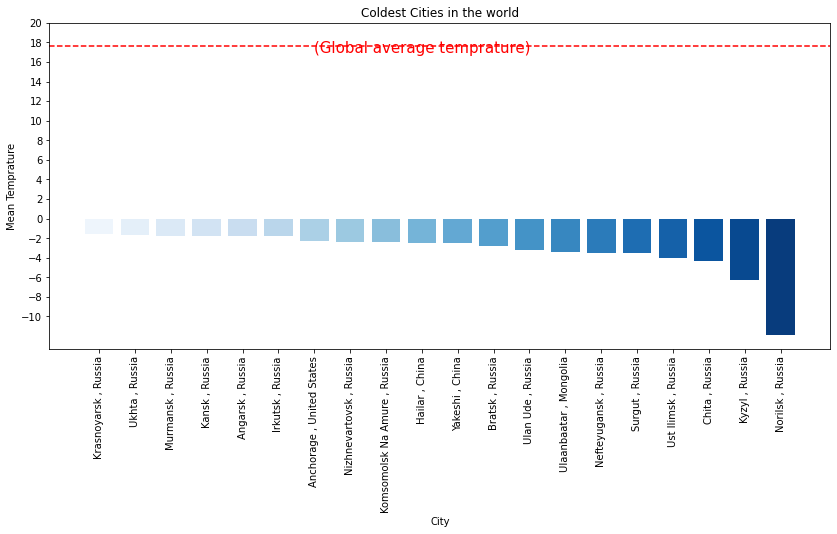

In [32]:
plt.figure(figsize=(14,6))

plt.bar(coldest_index , coldest.values[:, 0]
        , color=sns.color_palette("Blues" , len(coldest) ))
plt.axhline(y=temp["AverageTemperature"].mean() , color="red" , linestyle="--")
plt.yticks(np.arange(-10,21,2))
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Mean Temprature")
plt.title("Coldest Cities in the world")
plt.text(6,17,"(Global average temprature)" , color="red" , fontsize=15 )

# looking for country Finland

In [33]:
fin_data = data[data["Country"] == "Finland"]
fin_data["Month"] = pd.DatetimeIndex(fin_data["dt"]).month
fin_data.drop(columns=["Country"] , axis=1 , inplace=True)
fin_data.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude,Month
2267870,1743-11-01,1.550,2.024,Espoo,60.27N,25.95E,11
2267875,1744-04-01,2.252,3.770,Espoo,60.27N,25.95E,4
2267876,1744-05-01,6.603,1.646,Espoo,60.27N,25.95E,5
2267877,1744-06-01,12.641,1.426,Espoo,60.27N,25.95E,6
2267878,1744-07-01,16.399,1.148,Espoo,60.27N,25.95E,7


Higlight the climate of Finland

In [34]:
fin_data["AverageTemperature"].describe()

count    15830.000000
mean         3.711645
std          8.800342
min        -20.631000
25%         -3.426750
50%          3.041000
75%         11.753750
max         21.535000
Name: AverageTemperature, dtype: float64

In [35]:
fin_data['City'].unique()

array(['Espoo', 'Helsinki', 'Oulu', 'Tampere', 'Turku'], dtype=object)

so there are 5 major cities in finland is available in the data


In [36]:
tam = fin_data[fin_data["City"] == "Tampere"]
tam.drop(columns=["City" , "Latitude" , "Longitude"] , axis=1 , inplace=True)
tam.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Month
7418652,1743-11-01,0.048,2.267,11
7418657,1744-04-01,2.113,4.263,4
7418658,1744-05-01,7.859,1.747,5
7418659,1744-06-01,13.365,1.507,6
7418660,1744-07-01,16.217,1.277,7


In [37]:
tam["AverageTemperature"].describe()

count    3166.000000
mean        3.675837
std         8.830925
min       -18.228000
25%        -3.827500
50%         2.891000
75%        11.894750
max        20.263000
Name: AverageTemperature, dtype: float64

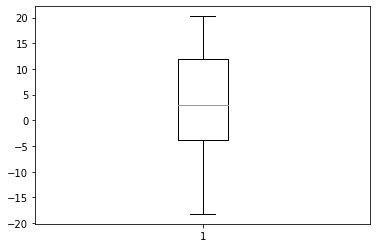

In [38]:
fig = plt.boxplot(tam["AverageTemperature"])

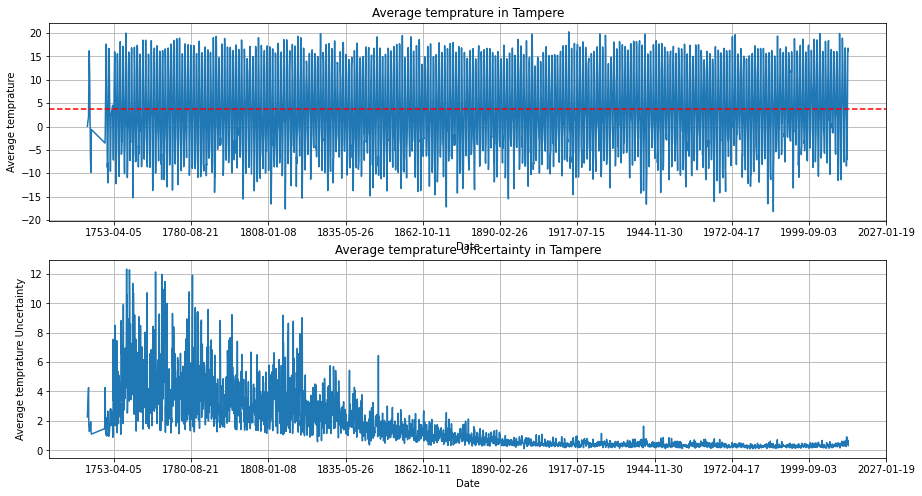

In [39]:
fig , ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(tam["dt"] ,tam["AverageTemperature"])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(12))
ax[0].axhline(y = tam["AverageTemperature"].mean() , color="red" , linestyle="--")
ax[0].set_title("Average temprature in Tampere")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Average temprature")
ax[0].grid()

ax[1].plot(tam["dt"] ,tam["AverageTemperatureUncertainty"])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(12))
#ax[0].axhline(y = tam["AverageTemperatureUncertainty"].mean() , color="red" , linestyle="--")
ax[1].set_title("Average temprature Uncertainty in Tampere")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Average temprature Uncertainty")
ax[1].grid()

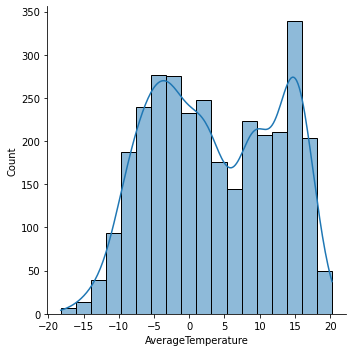

In [40]:
sns.displot(tam["AverageTemperature"] , kde=True)

There is uncertainity before 1900 about the records so we will drop those and focus on recent times

In [41]:
tam = tam[tam["dt"] >=  pd.Timestamp('1900-01-01 00:00:00')]

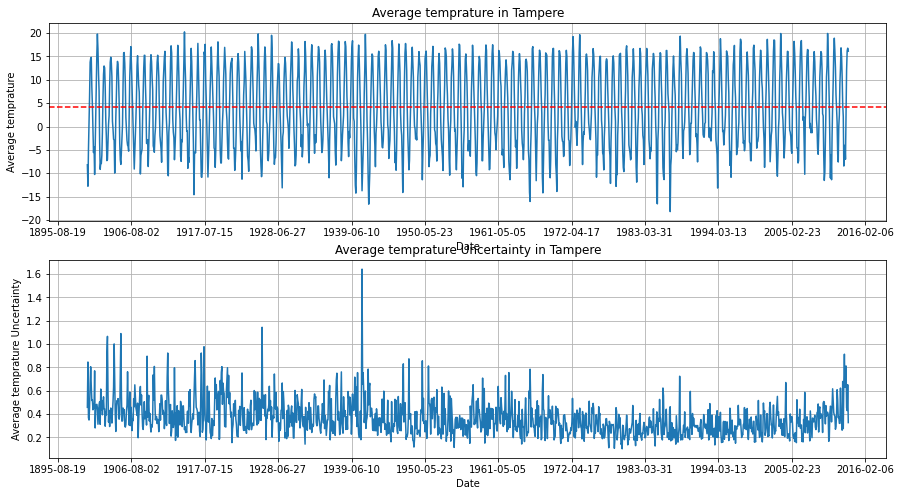

In [42]:
fig , ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(tam["dt"] ,tam["AverageTemperature"])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(12))
ax[0].axhline(y = tam["AverageTemperature"].mean() , color="red" , linestyle="--")
ax[0].set_title("Average temprature in Tampere")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Average temprature")
ax[0].grid()

ax[1].plot(tam["dt"] ,tam["AverageTemperatureUncertainty"])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(12))
#ax[0].axhline(y = tam["AverageTemperatureUncertainty"].mean() , color="red" , linestyle="--")
ax[1].set_title("Average temprature Uncertainty in Tampere")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Average temprature Uncertainty")
ax[1].grid()

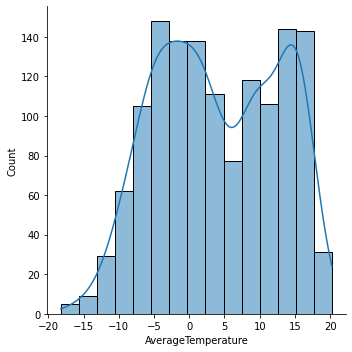

In [43]:
sns.displot(tam["AverageTemperature"] , kde=True)

In [44]:
temp = tam.groupby(["Month"]).mean()
temp.drop(columns=["AverageTemperatureUncertainty"] , axis=1 , inplace=True)
temp = temp.sort_values(["AverageTemperature"])

Text(0.5, 1.0, 'Average Temprature per Month in Tampere')

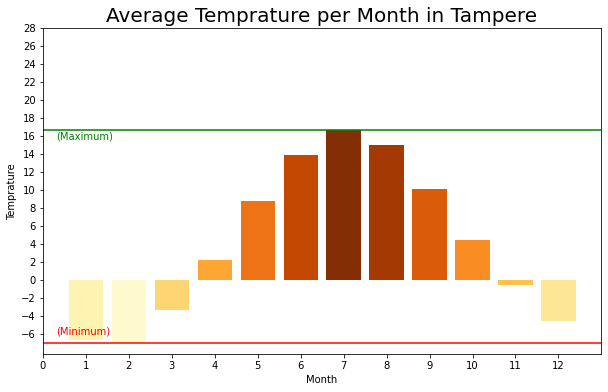

In [47]:
plt.figure(figsize=(10,6))
plt.bar(temp.index , temp["AverageTemperature"].values , color=sns.color_palette("YlOrBr",len(temp.index) ))

plt.axhline(y=temp["AverageTemperature"].values.min() , color="red")
plt.text(.3,temp["AverageTemperature"].values.min()+1 , "(Minimum)" , color='red')
plt.axhline(y=temp["AverageTemperature"].values.max() , color="green")
plt.text(.3,temp["AverageTemperature"].values.max()-1 , "(Maximum)" , color='green')

xticks = plt.xticks(range(13))
yticks = plt.yticks(np.arange(-6,30 ,2))
plt.xlabel("Month")
plt.ylabel("Temprature")
plt.title("Average Temprature per Month in Tampere" , fontsize=20)